In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

In [2]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

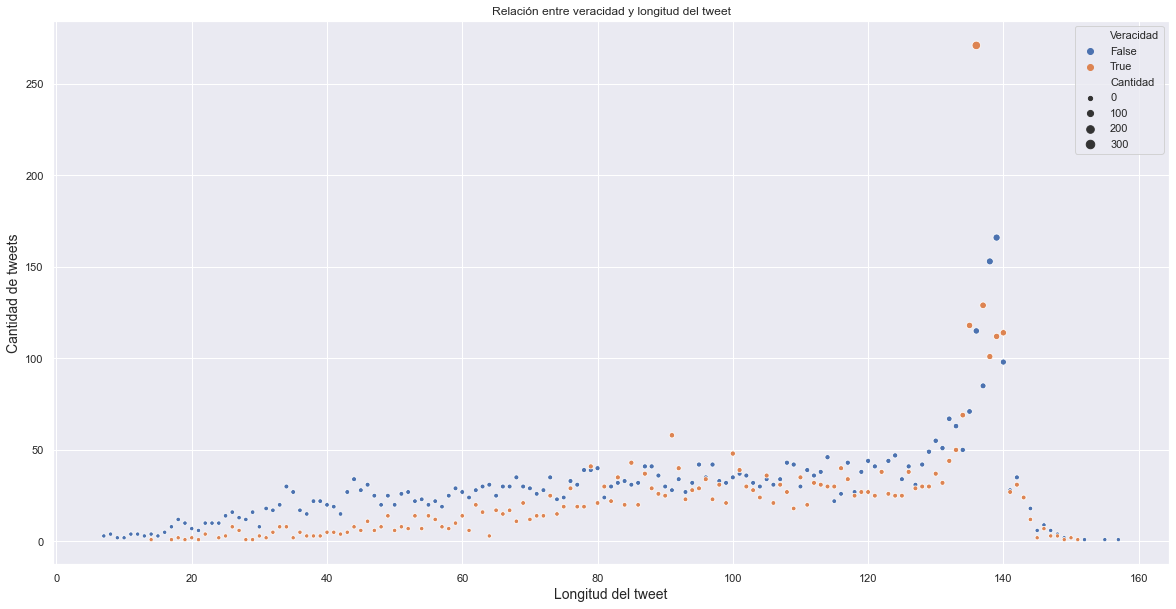

In [3]:
#Tweets por longitud y veracidad
grupo = dataset.groupby(['longitud', 'target']).agg({'target':['count']})
grupo.columns = ['Cantidad']

grupo = grupo.reset_index()
grupo = grupo.rename(columns={'target':'Veracidad'})

sns.set()
fig, ax = plt.subplots()
ax = sns.scatterplot(x = 'longitud', y = 'Cantidad', data = grupo, hue = 'Veracidad', size = 'Cantidad')
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Longitud del tweet",fontsize=14)
ax.set_title('Relación entre veracidad y longitud del tweet')
fig = ax.get_figure()
#fig.savefig('figure.png')